In [1]:
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from src.models.dcgan import Generator

In [ ]:
nz=100
device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")

fixed_noise = torch.randn(64, nz, 1, 1, device=device)




In [ ]:
import json

with open('configs/config_dcgan.json') as f:
    cfg = json.load(f)


In [ ]:
def get_im(k):
    saved_dict = torch.load(f'saved/dcgan/2/epoch_{k}.pth')
    gen = Generator(**cfg['model']['args'])
    gen.load_state_dict(saved_dict['state_dict_gen'])
    gen = gen.to(device)
    gen.eval()
    fake = gen(fixed_noise).detach().cpu()
    plt.axis("off")
    a = vutils.make_grid(fake, padding=2, normalize=True)
    #photo = plt.imshow(np.transpose(a,(1,2,0)), animated=True)
    plt.imsave(f'images/epoch_{k}.jpg', np.transpose(a.numpy(),(1,2,0)))

100%|██████████| 87/87 [00:10<00:00,  8.62it/s]


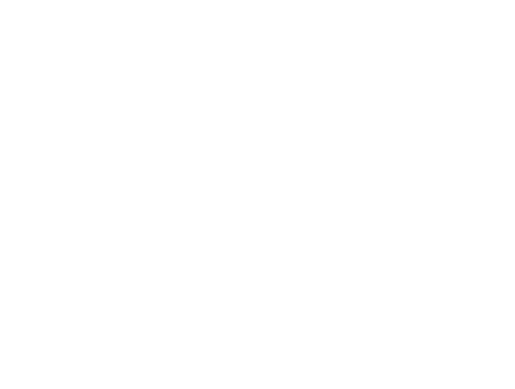

In [ ]:
for k in tqdm(range(87)):
    get_im(k)

In [ ]:
import glob
from PIL import Image


def make_gif(frame_folder):
    names = glob.glob(f"{frame_folder}/*.jpg")
    names.sort()
    frames = [Image.open(image) for image in names]
    frame_one = frames[0]
    frame_one.save("my_awesome.gif", format="GIF", append_images=frames,
               save_all=True, duration=100, loop=0)

In [ ]:
make_gif('./images')